# ИУ5-21М Ковыршин Павел Алексеевич Вариант 6

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
data = pd.read_csv('titanic.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Удаление пропусков методом заполнения средним значением

In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
mean_age = np.mean(data['Age'].dropna())

mean_age

29.69911764705882

In [16]:
data['Age'] = data['Age'].fillna(mean_age)

data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [17]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Замена выбросов методом трех сигм

In [18]:
lower = data['Age'].mean() - (3 * data['Age'].std())
upper = data['Age'].mean() + (3 * data['Age'].std())

lower, upper

(-9.306928030949827, 68.70516332506747)

In [19]:
data['Age_limited'] = data['Age'].where(data['Age'] > lower, lower).where(data['Age'] < upper, upper)

min(data['Age_limited']), max(data['Age_limited'])

(0.42, 68.70516332506747)

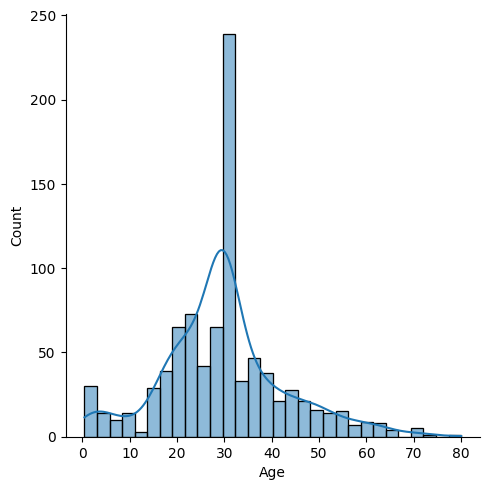

In [20]:
sns.displot(data=data, x='Age', kde=True)

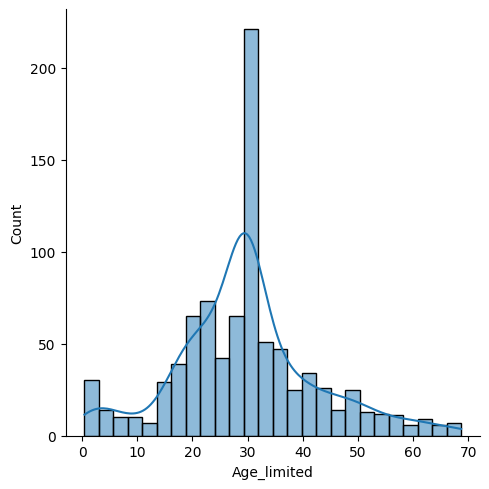

In [21]:
sns.displot(data=data, x="Age_limited", kde=True)

## Диаграмма рассеяния

<Axes: xlabel='Age', ylabel='Fare'>

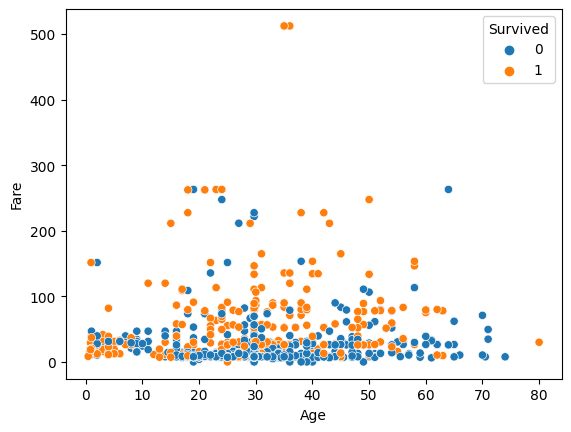

In [22]:
sns.scatterplot(
    data=data,
    x="Age",
    y="Fare",
    hue="Survived"
)